## Library dan Data yang digunakan

#### [Data yang digunakan](https://academy.dqlab.id/main/projectcode/215/398/1993?pr=0)

In [2]:
df_loan <- read.csv('https://storage.googleapis.com/dqlab-dataset/loan_disbursement.csv', stringsAsFactors = F)

dplyr::glimpse(df_loan)

Rows: 9,754
Columns: 5
$ loan_id      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ tanggal_cair <chr> "2020-01-06", "2020-01-06", "2020-01-06", "2020-01-06", "…
$ cabang       <chr> "AA", "AA", "AA", "AA", "AA", "AA", "AB", "AB", "AB", "AB…
$ agen         <chr> "AA-1", "AA-1", "AA-1", "AA-2", "AA-2", "AA-2", "AB-1", "…
$ amount       <int> 320000, 440000, 200000, 430000, 360000, 220000, 320000, 4…


## Summary data bulan lalu (Mei 2020)

#### [Memfilter data bulan Mei 2020, dan jumlahkan data per cabang](https://academy.dqlab.id/main/livecode/215/399/1994?pr=0)

In [3]:
library(dplyr)

df_loan_mei <- df_loan %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by(cabang) %>% 
  summarise(total_amount = sum(amount))
  
df_loan_mei

cabang,total_amount
<chr>,<int>
AA,75710000
AB,81440000
AC,83990000
AD,76080000
AE,54200000
AF,68040000
AG,74080000
AH,73840000
AI,46640000


#### [Tampilkan data 5 cabang dengan total amount paling besar](https://academy.dqlab.id/main/livecode/215/399/1995?pr=0)

In [4]:
library(scales)

df_loan_mei %>% 
  arrange(desc(total_amount)) %>% 
  mutate(total_amount = comma(total_amount)) %>% 
  head(5)

cabang,total_amount
<chr>,<chr>
AC,"83,990,000"
AB,"81,440,000"
AD,"76,080,000"
AA,"75,710,000"
AG,"74,080,000"


#### [Tampilkan data 5 cabang dengan total amount paling kecil](https://academy.dqlab.id/main/livecode/215/399/1996?pr=0)

In [5]:
df_loan_mei %>% 
  arrange(total_amount) %>% 
  mutate(total_amount = comma(total_amount)) %>% 
  head(5)

cabang,total_amount
<chr>,<chr>
AV,"30,280,000"
AS,"31,740,000"
AT,"34,840,000"
AU,"35,610,000"
AO,"39,120,000"


Terjadi perbedaan yang sangat signifikan antara top 5 dengan bottom 5. Hal ini mungkin karena umur cabang yang berbeda beda karena ada pertumbuhan cabang baru setiap bulannya.

## Melihat hubungan umur cabang dengan total amount

#### [Menghitung umur cabang (dalam bulan)](https://academy.dqlab.id/main/livecode/215/400/1998?pr=0)

In [6]:
df_cabang_umur <- df_loan %>%
  group_by(cabang) %>% 
  summarise(pertama_cair = min(tanggal_cair)) %>% 
  mutate(umur = as.numeric(as.Date('2020-05-15') - as.Date(pertama_cair)) %/% 30) 

df_cabang_umur

cabang,pertama_cair,umur
<chr>,<chr>,<dbl>
AA,2020-01-06,4
AB,2020-01-06,4
AC,2020-01-06,4
AD,2020-01-06,4
AE,2020-02-03,3
AF,2020-02-03,3
AG,2020-02-03,3
AH,2020-02-03,3
AI,2020-03-02,2


#### [Gabungkan data umur dan performa mei](https://academy.dqlab.id/main/livecode/215/400/1999?pr=0)

In [8]:
df_loan_mei_umur <- df_cabang_umur %>%
  inner_join(df_loan_mei, by = 'cabang')

df_loan_mei_umur

cabang,pertama_cair,umur,total_amount
<chr>,<chr>,<dbl>,<int>
AA,2020-01-06,4,75710000
AB,2020-01-06,4,81440000
AC,2020-01-06,4,83990000
AD,2020-01-06,4,76080000
AE,2020-02-03,3,54200000
AF,2020-02-03,3,68040000
AG,2020-02-03,3,74080000
AH,2020-02-03,3,73840000
AI,2020-03-02,2,46640000


#### [Plot relasi umur dan performa mei](https://academy.dqlab.id/main/livecode/215/400/2000?pr=0)

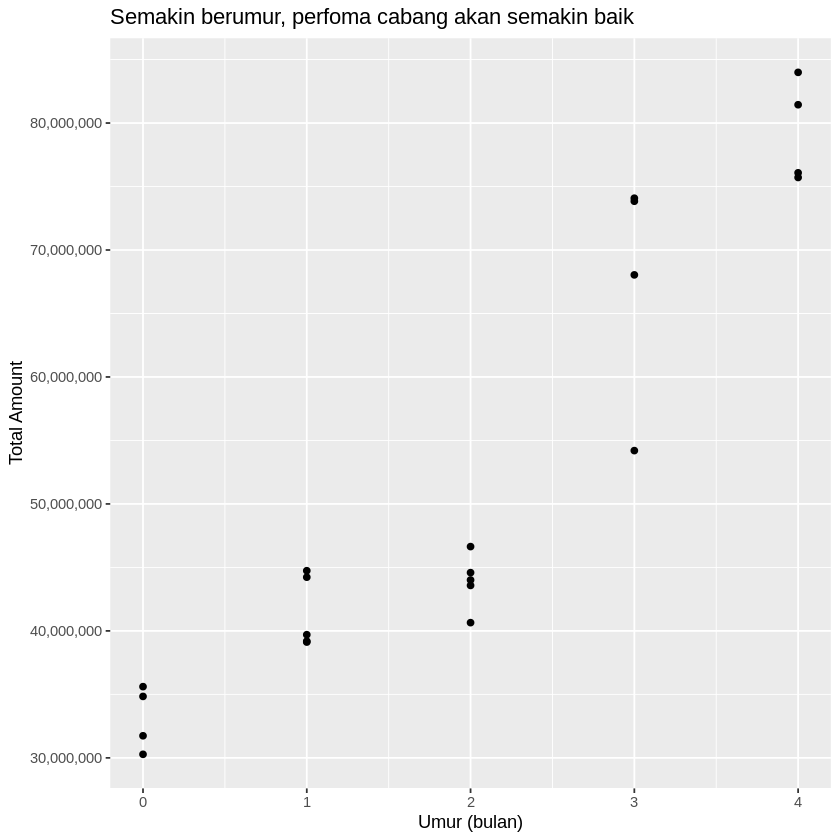

In [9]:
library(ggplot2)

ggplot(df_loan_mei_umur, aes(x = umur, y = total_amount)) +
  geom_point() +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Semakin berumur, perfoma cabang akan semakin baik",
       x = "Umur (bulan)",
       y = "Total Amount")

Terlihat bahwa ada pola semakin tua cabang, maka performa nya semakin baik.
Hal ini karena cabang tersebut masih berkembang sehingga belum sampai pada performa maksimal.

Akan tetapi pada masing - masing umur itu juga ada cabang yang performanya dibawah yang lain.

## Cabang dengan performa rendah pada kelompok umur

#### [Mencari cabang yang perfoma rendah untuk setiap umur](https://academy.dqlab.id/main/livecode/215/401/2002?pr=0)

In [10]:
df_loan_mei_flag <- df_loan_mei_umur %>% 
  group_by(umur) %>% 
  mutate(Q1 = quantile(total_amount, 0.25),
	   Q3 = quantile(total_amount, 0.75),
	  IQR = (Q3-Q1)) %>%
  mutate(flag = ifelse(total_amount < (Q1 - IQR), 'rendah','baik'))

df_loan_mei_flag %>% 
  filter(flag == 'rendah') %>% 
  mutate_if(is.numeric, funs(comma))

`mutate_if()` ignored the following grouping variables:
• Column `umur`
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


cabang,pertama_cair,umur,total_amount,Q1,Q3,IQR,flag
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
AE,2020-02-03,3,"54,200,000","64,580,000","73,900,000","9,320,000",rendah
AL,2020-03-02,2,"40,650,000","43,580,000","44,590,000","1,010,000",rendah


#### [Buat Scatterplot lagi dan beri warna merah pada cabang yang rendah tadi](https://academy.dqlab.id/main/livecode/215/401/2003?pr=0)

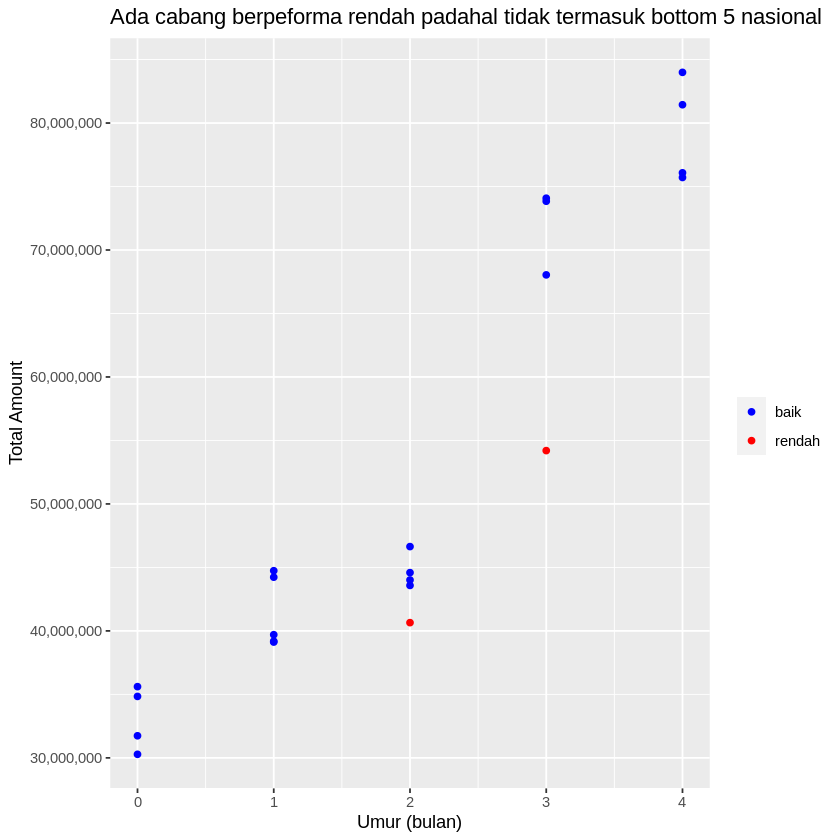

In [11]:
ggplot(df_loan_mei_flag, aes(x = umur, y = total_amount)) +
  geom_point(aes(color = flag)) +
  scale_color_manual(breaks = c("baik", "rendah"),
                     values = c("blue", "red")) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Ada cabang berpeforma rendah padahal tidak termasuk bottom 5 nasional",
       color = "",
       x = "Umur (bulan)",
       y = "Total Amount")

## Analisis cabang dengan performa rendah

#### [Lihat perbadingan performa cabang di umur yang sama](https://academy.dqlab.id/main/livecode/215/402/2004?pr=0)

In [12]:
df_loan_mei_flag %>% 
  filter(umur == 3) %>% 
  inner_join(df_loan, by = 'cabang') %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by(cabang, flag) %>% 
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            agen_aktif = n_distinct(agen),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  arrange(total_amount) %>% 
  mutate_if(is.numeric, funs(comma))

`summarise()` has grouped output by 'cabang'. You can override using the
`.groups` argument.
`mutate_if()` ignored the following grouping variables:
• Column `cabang`


cabang,flag,jumlah_hari,agen_aktif,total_loan_cair,avg_amount,total_amount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AE,rendah,21,3,175,"309,714","54,200,000"
AF,baik,21,3,225,"302,400","68,040,000"
AH,baik,21,3,241,"306,390","73,840,000"
AG,baik,21,3,241,"307,386","74,080,000"


#### [Lihat perbadingan performa agen pada cabang yang rendah](https://academy.dqlab.id/main/livecode/215/402/2005?pr=0)

In [13]:
df_loan_mei_flag %>% 
  filter(umur == 3, flag == 'rendah') %>% 
  inner_join(df_loan, by = 'cabang') %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by(cabang, agen) %>% 
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  arrange(total_amount) %>% 
  mutate_if(is.numeric, funs(comma))

`summarise()` has grouped output by 'cabang'. You can override using the
`.groups` argument.
`mutate_if()` ignored the following grouping variables:
• Column `cabang`


cabang,agen,jumlah_hari,total_loan_cair,avg_amount,total_amount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AE,AE-3,4,16,"310,625","4,970,000"
AE,AE-2,18,73,"320,274","23,380,000"
AE,AE-1,21,86,"300,581","25,850,000"


#### [Lihat perbadingan performa agen pada cabang yang paling baik umur 3 bulan](https://academy.dqlab.id/main/livecode/215/402/2007?pr=0)

In [14]:
df_loan %>% 
  filter(cabang == 'AH') %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by(cabang, agen) %>% 
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  arrange(total_amount) %>% 
  mutate_if(is.numeric, funs(comma))

`summarise()` has grouped output by 'cabang'. You can override using the
`.groups` argument.
`mutate_if()` ignored the following grouping variables:
• Column `cabang`


cabang,agen,jumlah_hari,total_loan_cair,avg_amount,total_amount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AH,AH-3,19,74,"303,649","22,470,000"
AH,AH-1,21,81,"301,358","24,410,000"
AH,AH-2,21,86,"313,488","26,960,000"


Berdasarkan analisis tersebut, dapat disimpulkan bahwa rendahnya performa dari cabang AE adalah karena salah satu agen yang melakukan pencairan hanya 4 hari dalam 1 bulan, padahal agen lain bisa aktif 21 hari.

Hal ini membuat total amount dari agen tersebut hanya 20% dibandingkan agen yang lainnya.

Sedangkan pada cabang AH, performanya sangat baik karena ketiga agen melakukan pencairan hampir / selalu setiap hari kerja. 2 orang full 21 hari 1 orang 19 hari. Sehingga performa nya terjaga dengan baik.

Perlu diperhatikan juga bahwa untuk membandingkan performa cabang itu sebaiknya di kelompokkan dulu berdasarkan karakteristik yang sama. Tidak langsung semua cabang dibandingkan tanpa mengetahui karakteristik nya.

Apalagi ketika dalam real world nanti cabang ini bisa terletak di berbeda wilayah (pulau misalnya) yang mempunyai kultur yang berbeda

Selanjutnya perlu dianalisis lebih lanjut kenapa ada agen yang hanya aktif beberapa hari saja dalam sebulan.

Untuk kedepannya setiap agen agar dipastikan untuk bisa aktif setiap hari nya, sehingga bisa menjaga performa cabang.